# Downside Risk and Sortino Ratio

## Getting Ready

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
returns = pd.read_csv("returns.csv", index_col = "Date", parse_dates = ["Date"])
returns.head(50)

In [ ]:
returns.cumsum().apply(np.exp).plot(figsize = (12, 8))
plt.show()

In [ ]:
td_year = (returns.count() / ((returns.index[-1] - returns.index[0]).days / 365.25)).iloc[0]
td_year

## Downside Deviation (Semi-Deviation)

In [ ]:
returns

In [ ]:
symbol = "USD_GBP"

In [ ]:
TMR = 0 # target minimum return

In [ ]:
excess_returns = returns[symbol] - TMR # excess returns over TMR

In [ ]:
excess_returns = np.where(excess_returns < 0, excess_returns, 0) # setting postive excess returns to zero. 
excess_returns

In [ ]:
downside_deviation = np.sqrt(np.mean(excess_returns**2)) 
downside_deviation

## Sortino Ratio

In [ ]:
downside_deviation

In [ ]:
mean = returns[symbol].mean() 
mean

In [ ]:
sortino = (mean - TMR) / downside_deviation * np.sqrt(td_year)
sortino

## Putting everything toghether

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
returns = pd.read_csv("returns.csv", index_col = "Date", parse_dates = ["Date"])
returns

In [ ]:
def sortino(series, TMR = 0):
    excess_returns = (series - TMR)
    downside_deviation = np.sqrt(np.mean(np.where(excess_returns < 0, excess_returns, 0)**2))
    if downside_deviation == 0:
        return np.nan
    else:
        sortino = (series.mean() - TMR) / downside_deviation * np.sqrt(series.count() / ((series.index[-1] - series.index[0]).days / 365.25))
        return sortino

In [ ]:
returns.apply(sortino).sort_values(ascending = False)

In [ ]:
sortino(series = returns.USD_GBP, TMR = 0)

-------------------------------------

## Coding Challenge

__Calculate and compare__ the __Sortino Ratio__ (assumption: TMR == 0) for __30 large US stocks__ that currently form the Dow Jones Industrial Average Index ("Dow Jones") for the time period between April 2019 and June 2021. 

__Hint:__ You can __import__ the price data from __"Dow_Jones.csv"__.
 

Determine the __best performing stock__ and the __worst performing stock__ according to the Sortino Ratio.

__Compare__ Sortino Ratio and Sharpe Ratio. Does the __ranking change__?

(Remark: Dividends are ignored here. Hence, for simplicity reasons, the Sortino Ratio is based on Price Returns only. As a consequence, dividend-paying stocks are getting penalized.) 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

def norm(sr=None):
    if sr is None:
        return np.nan
    else:
        sr.fillna(method='bfill', axis=0, inplace=True)
        return (sr.div(sr.iloc[0]))
    
def sharpe_table(norm_returns = None, rf = 0):
    result = pd.DataFrame()
    result['mean'] = norm_returns.mean() * norm_returns.count() / ((norm_returns.index[-1] - norm_returns.index[0]).days / 365.25)
    result['std'] = norm_returns.std() * np.sqrt(norm_returns.count() / ((norm_returns.index[-1] - norm_returns.index[0]).days / 365.25))
    result['Sharpe Ratio'] = result['mean'].div(result['std'])
    return result

def plot_sharpe(df, l = 10):
    limiter = l
    #line = pd.DataFrame(data=[[0,0],[0.5,0.5]], columns=['x','y'])
    plots = df.iloc[:limiter] 
    line = pd.DataFrame(data=[[0,0],[plots['std'].max(),plots['mean'].max()]], columns=['x','y'])

    plt.figure(figsize = (12,8))

    plots.plot(kind = "scatter", x='std', y='mean', figsize = (15,8), s = 50, fontsize = 15)
    for i in plots.index:
        plt.annotate(i, xy=(plots.loc[i, "std"]+0.0005, plots.loc[i, "mean"]+0.0005), size = 15)
    plt.xlabel("Risk (std)", fontsize = 15)
    plt.ylabel("Mean Return", fontsize = 15)
    plt.title("Top {} Stocks: Mean-Variance Analysis".format(limiter), fontsize = 20)
    plt.plot(line.x, line.y, label = 'Trend Line')
    plt.show()
    
def sortino(norm_returns = None, TMR = 0):
    excess_returns = (norm_returns - TMR)
    downside_deviation = np.sqrt(np.mean(np.where(excess_returns<0, excess_returns, 0)**2))
    if downside_deviation ==0:
        return np.nan
    else:
        sortino_result = (norm_returns.mean()-TMR)/downside_deviation * np.sqrt(norm_returns.count() /((norm_returns.index[-1] - norm_returns.index[0]).days / 365.25)) #this is td_year
        return sortino_result

In [5]:
raw = pd.read_csv('Dow_Jones.csv', parse_dates=True,index_col=['Date']).dropna()
raw

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2019-04-01,47.810001,191.770004,111.699997,391.540009,140.250000,161.179993,54.980000,124.940002,112.510002,53.500000,...,79.484734,119.019997,85.230003,103.639999,138.020004,245.539993,157.259995,59.090000,63.490002,97.820000
2019-04-02,48.505001,192.429993,111.000000,390.750000,140.190002,160.509995,55.290001,124.930000,111.959999,56.250000,...,79.398857,119.190002,84.370003,103.750000,136.809998,244.410004,157.779999,58.529999,55.360001,96.940002
2019-04-03,48.837502,192.919998,110.559998,384.739990,139.259995,162.619995,55.630001,123.889999,112.519997,56.880001,...,79.370232,119.970001,84.470001,103.690002,136.600006,245.839996,158.460007,58.869999,54.840000,97.190002
2019-04-04,48.922501,192.330002,110.120003,395.859985,140.130005,158.520004,55.139999,124.800003,114.750000,59.709999,...,78.101143,119.360001,85.279999,103.430000,136.520004,247.389999,157.639999,58.990002,54.150002,98.110001
2019-04-05,49.250000,195.410004,110.959999,391.929993,140.360001,158.559998,55.209999,126.419998,115.000000,57.240002,...,77.433205,119.889999,85.400002,103.650002,136.399994,248.779999,157.649994,59.090000,54.689999,98.830002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-08,126.739998,236.820007,166.509995,252.759995,240.160004,236.419998,54.130001,108.730003,176.330002,69.379997,...,72.400002,252.570007,133.350006,134.839996,157.539993,401.739990,232.050003,57.150002,54.000000,139.830002
2021-06-09,127.129997,239.520004,164.089996,248.059998,234.649994,236.089996,54.020000,107.779999,176.039993,68.839996,...,74.040001,253.589996,131.839996,134.789993,154.740005,401.100006,232.309998,57.049999,53.430000,139.080002
2021-06-10,126.110001,244.639999,162.229996,248.339996,225.729996,240.190002,55.029999,108.410004,176.570007,67.989998,...,76.139999,257.239990,130.979996,135.789993,154.020004,401.489990,233.949997,57.340000,55.310001,139.880005


In [40]:
norm_raw = raw.apply(norm)
norm_returns = np.log(norm_raw/norm_raw.shift())
results = []
sharpe_result = sharpe_table(norm_returns).sort_values(by='Sharpe Ratio', ascending=False)
sortino_result = sortino(norm_returns, 0).to_frame().sort_values(by=0, ascending=False)
sortino_result.rename(columns={0:"Sortino Ratio"}, inplace=True)
results = sharpe_table(norm_returns)
results['Sortino Ratio'] = sortino_result
results.loc[:,['Sharpe Ratio', 'Sortino Ratio']]
#display(sortino_result,sharpe_result['Sharpe Ratio'].to_frame())

,Sharpe Ratio,Sortino Ratio
AAPL,1.238518,1.758777
AMGN,0.347269,0.401666
AXP,0.383773,0.670746
BA,-0.333924,-0.820293
CAT,0.567079,0.780760
CRM,0.480283,0.742527
CSCO,-0.020246,-0.026001
CVX,-0.147798,-0.255728
DIS,0.556242,0.805392
DOW,0.207472,0.393127


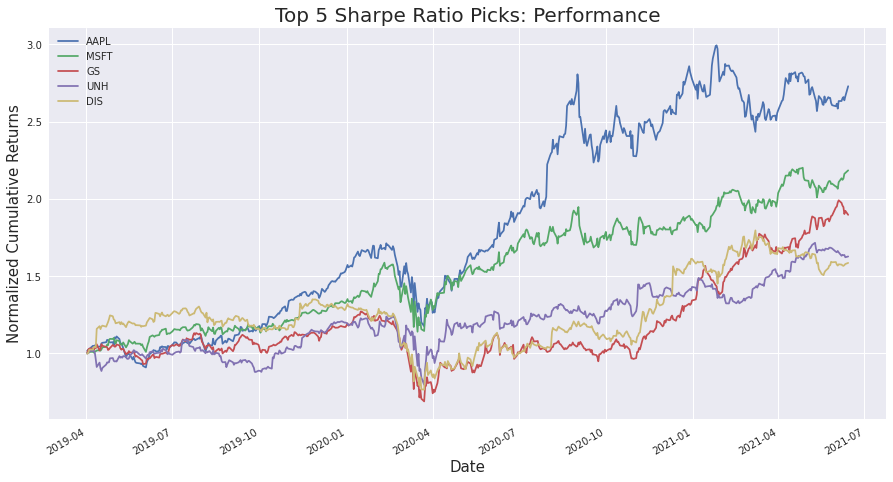

In [10]:
n = 5
best = True
sor_portfolio = list(sortino_result.sort_values(by='Sortino Ratio', ascending=not best).index[0:n].values)

best_returns = np.log(norm_raw/norm_raw.shift())

#best_returns.loc[:,sor_portfolio].dropna().cumsum().apply(np.exp).iloc[[-1],:].mean().mean()

#old formula was incorrect, refer to NB_02 in this folder for correct formula!
cagr=0

best_returns.loc[:,sor_portfolio].dropna().cumsum().apply(np.exp).plot(figsize=(15,8))
plt.xlabel("Date", fontsize = 15)
plt.ylabel("Normalized Cumulative Returns", fontsize = 15)
plt.title("Top {} Sharpe Ratio Picks: Performance".format(n,cagr*100), fontsize = 20)
plt.show()
#best_returns.loc[:,sor_portfolio].dropna().cumsum().apply(np.exp)
#1.44*1.44*1.44


2.496880343104

In [ ]:
(np.exp(best_returns.loc[:,sor_portfolio].dropna().mean()*best_returns.loc[:,sor_portfolio].count() / ((best_returns.loc[:,sor_portfolio].index[-1] - best_returns.loc[:,sor_portfolio].index[0]).days / 365.25))-1)
1.577017**2

In [ ]:
np.log(norm_raw/norm_raw.shift()).cumsum().apply(np.exp)

## +++ Please stop here in case you don´t want to see the solution!!! +++++

## Coding Challenge Solution

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("Dow_Jones.csv", index_col = "Date", parse_dates = ["Date"])
df

In [ ]:
returns = np.log(df / df.shift()) # daily log returns
returns

In [ ]:
def sortino(series, TMR = 0):
    excess_returns = (series - TMR)
    downside_deviation = np.sqrt(np.mean(np.where(excess_returns < 0, excess_returns, 0)**2))
    if downside_deviation == 0:
        return np.nan
    else:
        sortino = (series.mean() - TMR) / downside_deviation * np.sqrt(series.count() / ((series.index[-1] - series.index[0]).days / 365.25))
        return sortino

In [ ]:
sort = returns.apply(sortino).sort_values(ascending = False)
sort

Best Performing Stock: __Apple__ (AAPL) <br>
Worst Performing Stock: __Non-determinable__ (note: you can´t compare negative Sortino Ratios)

In [ ]:
def sharpe(series, rf = 0):
    
    if series.std() == 0:
        return np.nan
    else:
        return (series.mean() - rf) / series.std() * np.sqrt(series.count() / ((series.index[-1] - series.index[0]).days / 365.25))

In [ ]:
sha = returns.apply(sharpe).sort_values(ascending = False)
sha

In [ ]:
merged = pd.concat([sort, sha], axis = 1)
merged

In [ ]:
merged.columns = ["Sortino", "Sharpe"]

In [ ]:
merged.rank(ascending = False)

-> Few Differences. __Disney gets better ranked__ with Sortino (-3) while __The Home Depot gets penalized__ by Sortino (+3).